In [21]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

## Modeling and Training ##

In [26]:
# Import data
mnist = input_data.read_data_sets("mnist_input_data/", one_hot=True)

Extracting mnist_input_data/train-images-idx3-ubyte.gz
Extracting mnist_input_data/train-labels-idx1-ubyte.gz
Extracting mnist_input_data/t10k-images-idx3-ubyte.gz
Extracting mnist_input_data/t10k-labels-idx1-ubyte.gz


In [27]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [36]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

In [37]:
# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y) )
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [38]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

### training ###

In [62]:
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

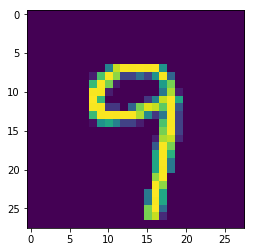

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
9


In [79]:
xs, ys = mnist.train.next_batch(1)
plt.imshow(xs.reshape( (28,28) ), interpolation="nearest")
plt.show()
print(ys)
print(np.where(ys==1)[1][0])

### testing ###

In [86]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9194


## Seeing results of training ##

In [9]:
import gzip
import numpy as np
from matplotlib import pyplot as plt

In [5]:
content = gzip.open('/tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz', 'rb').read()

In [96]:
get_img = lambda i: np.array([ord(c) for c in content[16+(28*28)*i:16+(28*28)*(i+1)]]).reshape( (28,28) )
get_img2 = lambda i: mnist.test.images[i].reshape( (28,28) )
get_label = lambda i: mnist.test.labels[i]

In [104]:
img_n = 321

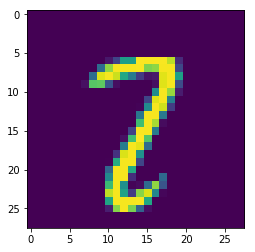

In [105]:
plt.imshow(get_img(img_n), interpolation="nearest")
plt.show()

In [106]:
inference = sess.run(y, {x: mnist.test.images[img_n:img_n+1] })
print( inference )
print( "NN infered:", np.where(inference == inference.max())[1][0] )
print( "real value:", np.where(get_label(img_n)==1)[0][0] )

[[-5.2831111  -1.34890914  1.9778583   4.14849615 -4.42337275  0.42044139
  -6.02785492  6.32220554  1.97149873  2.24277186]]
NN infered: 7
real value: 2
